# 합성곱 신경망의 시각화

In [ ]:
# !curl -L https://bit.ly/3DQeEH8 -o best_cnn_model.pt

In [1]:
import torch.nn as nn

model=nn.Sequential()
model.add_module('conv1',nn.Conv2d(1,32,kernel_size=3,padding='same'))
model.add_module('relu1',nn.ReLU())
model.add_module('pool1',nn.MaxPool2d(2))
model.add_module('conv2',nn.Conv2d(32,64,kernel_size=3,padding='same'))
model.add_module('relu2',nn.ReLU())
model.add_module('pool2',nn.MaxPool2d(2))
model.add_module('flatten',nn.Flatten())
model.add_module('dense1',nn.Linear(3136,100))
model.add_module('relu3',nn.ReLU())
model.add_module('dropout',nn.Dropout(0.3))
model.add_module('dense2',nn.Linear(100,10))

In [ ]:
import torch
model.load_state_dict(torch.load('best_cnn_model.pt',weights_only=True)) 

<All keys matched successfully>

In [3]:
layers=[layer for layer in model.children()]

In [4]:
print(layers[0])

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)


In [5]:
model[0]

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [6]:
for name,layer in model.named_children():
    print(f'{name:10s}',layer)

conv1      Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu1      ReLU()
pool1      MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
conv2      Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu2      ReLU()
pool2      MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
flatten    Flatten(start_dim=1, end_dim=-1)
dense1     Linear(in_features=3136, out_features=100, bias=True)
relu3      ReLU()
dropout    Dropout(p=0.3, inplace=False)
dense2     Linear(in_features=100, out_features=10, bias=True)


In [7]:
model.conv1

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [8]:
conv_weight=model.conv1.weight.data
print(conv_weight.mean(),conv_weight.std())

tensor(-0.0907) tensor(0.3927)


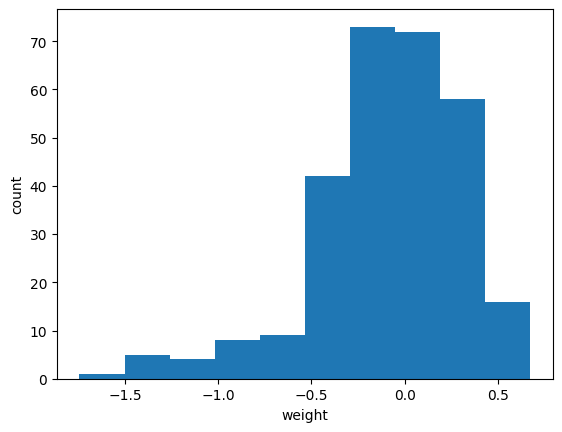

In [16]:
import matplotlib.pyplot as plt

plt.hist(conv_weight.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [17]:
print(conv_weight.shape)

torch.Size([32, 1, 3, 3])


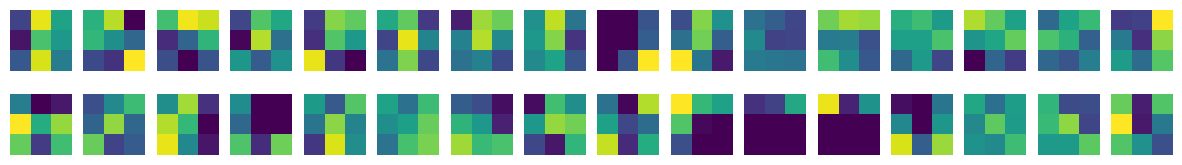

In [18]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weight[i*16+j,0,:,:],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [19]:
from torchvision.datasets import FashionMNIST

fm_train=FashionMNIST(root='.',train=True,download=True)
train_input=fm_train.data

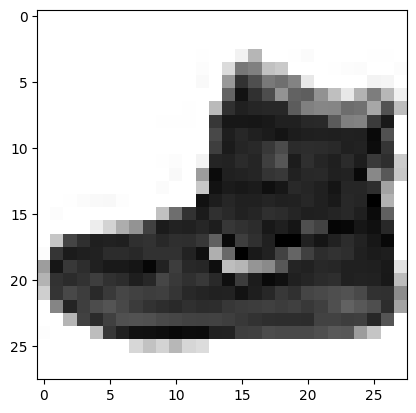

In [20]:
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [21]:
ankle_boot=train_input[0:1].reshape(1,1,28,28)/255.0

model.eval()
with torch.no_grad():
    feature_maps=model.conv1(ankle_boot)
    feature_maps=model.relu1(feature_maps)

In [23]:
print(feature_maps.shape)

torch.Size([1, 32, 28, 28])


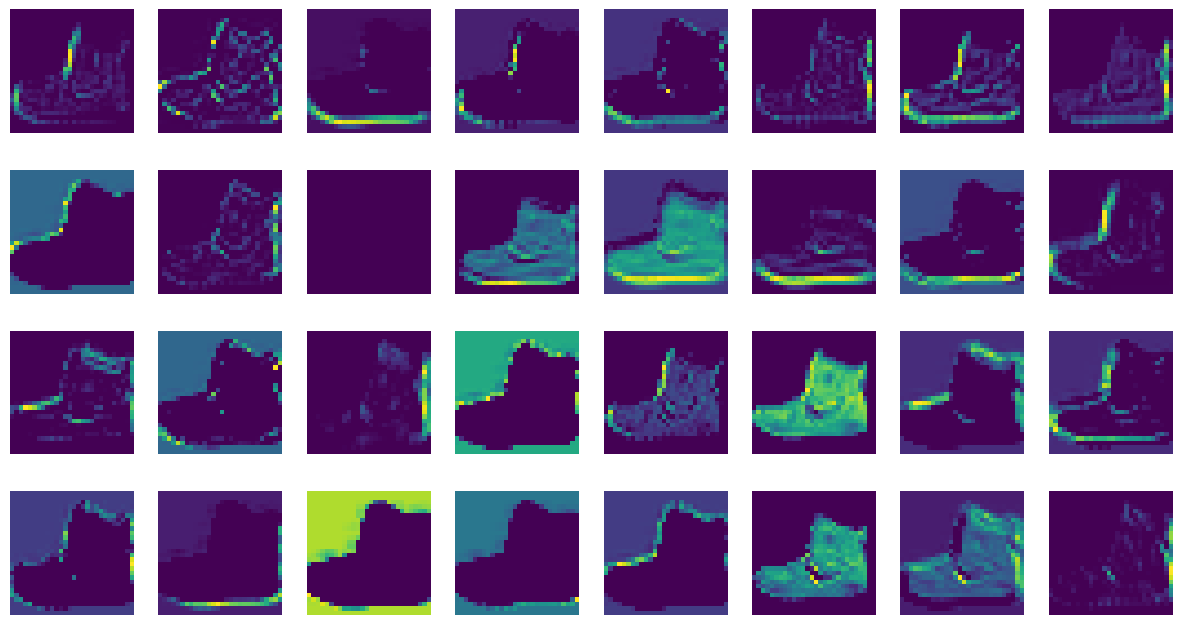

In [24]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i][j].imshow(feature_maps[0,i*8+j,:,:])
        axs[i,j].axis('off')
plt.show()

In [25]:
model.eval()
with torch.no_grad():
    feature_maps=model.conv1(ankle_boot)
    feature_maps=model.relu1(feature_maps)
    feature_maps=model.pool1(feature_maps)
    feature_maps=model.conv2(feature_maps)
    feature_maps=model.relu2(feature_maps)

In [26]:
model.eval()
x=ankle_boot
with torch.no_grad():
    for name,layer in model.named_children():
        x=layer(x)
        if(name=='relu2'):break
feature_maps=x

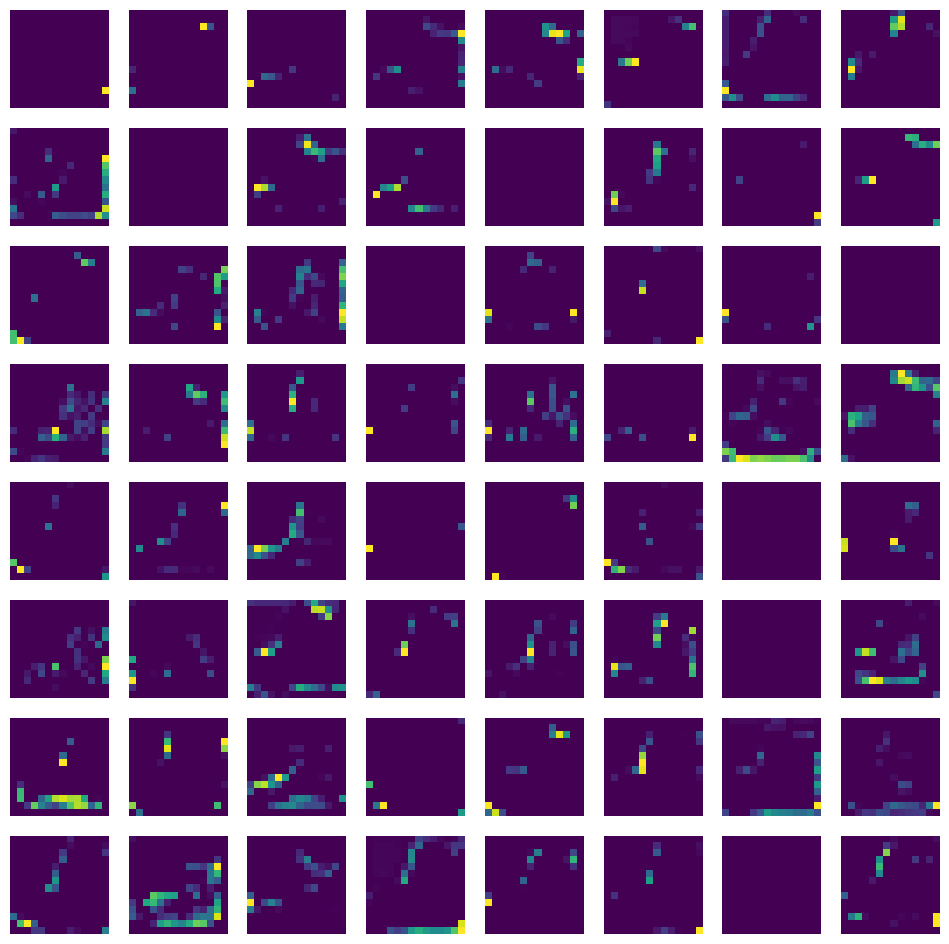

In [27]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,i*8+j,:,:])
        axs[i,j].axis('off')
plt.show()